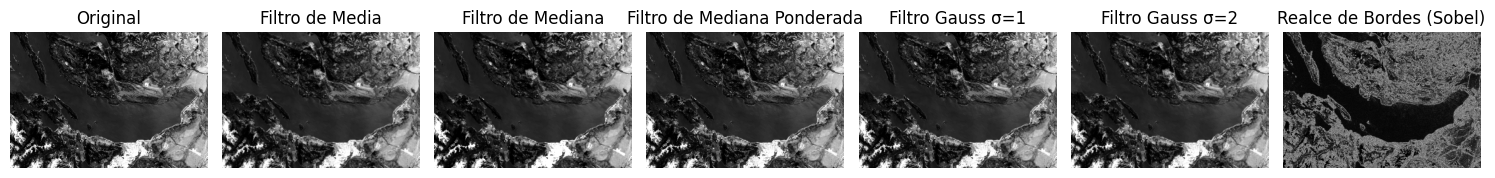

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image_path = 'bariloche2/B1.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Función para aplicar filtros
def apply_filters(img, window_size):
    results = {}

    # a) Suavizado con el filtro de la media
    mean_filter = cv2.blur(img, (window_size, window_size))
    results['Filtro de Media'] = mean_filter

    # b) Suavizado con el filtro de la mediana
    median_filter = cv2.medianBlur(img, window_size)
    results['Filtro de Mediana'] = median_filter

    # c) Suavizado con el filtro de la mediana ponderada de 3x3
    weighted_median_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
    weighted_median_kernel /= weighted_median_kernel.sum()
    weighted_median_filter = cv2.filter2D(img, -1, weighted_median_kernel)
    results['Filtro de Mediana Ponderada'] = weighted_median_filter

    # d) Suavizado con el filtro de Gauss para diferentes valores de σ y μ = 0
    gaussian_sigma1 = cv2.GaussianBlur(img, (window_size, window_size), sigmaX=1)
    gaussian_sigma2 = cv2.GaussianBlur(img, (window_size, window_size), sigmaX=2)
    results['Filtro Gauss σ=1'] = gaussian_sigma1
    results['Filtro Gauss σ=2'] = gaussian_sigma2

    # e) Realce de Bordes (Filtro de Sobel)
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobel_x, sobel_y)
    results['Realce de Bordes (Sobel)'] = np.uint8(edges)

    return results

# Tamaño de la ventana deslizante
window_size = 5  # Puedes ajustar el tamaño aquí

# Aplicar filtros y mostrar resultados
filtered_images = apply_filters(image, window_size)

# Visualización de los resultados
fig, axes = plt.subplots(1, len(filtered_images) + 1, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Mostrar cada imagen filtrada
for i, (title, img) in enumerate(filtered_images.items()):
    axes[i+1].imshow(img, cmap='gray')
    axes[i+1].set_title(title)
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()
